In [1]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as pimg

In [2]:
# Train & Test Set Load
train = pd.read_csv("../../csv/train_users_2.csv")
test = pd.read_csv("../../csv/test_users.csv")
ss = pd.read_csv("../../csv/sample_submission_NDF.csv")

In [7]:
# 보조 데이터 Set
age_gender = pd.read_csv("../../csv/age_gender_bkts.csv")
countries = pd.read_csv("../../csv/countries.csv")
sessions = pd.read_csv("../../csv/sessions.csv")

In [2]:
# train / test columns 비교
set(train.columns) - set(test.columns)

NameError: name 'train' is not defined

In [3]:
train.shape, test.shape

NameError: name 'train' is not defined

In [4]:
test.isnull().sum()

NameError: name 'test' is not defined

In [5]:
test.tail()

NameError: name 'test' is not defined

In [6]:
train.info()

NameError: name 'train' is not defined

In [7]:
train.isnull().sum()

NameError: name 'train' is not defined

In [8]:
for col in train.columns:
    print("{col} : {count}".format(col=col, count=len(train[col].unique())))

NameError: name 'train' is not defined

In [9]:
train.tail()

NameError: name 'train' is not defined

## Age Modeling (# of NaN = 87,990)

또 다른 조사기관인 닐슨온라인(Nielsen Online)의 조사에서도 이와 유사한 경향이 나타났음. 젊은 계층에 비해 나이 든 미국인들의 온라인 활동 비율은 낮지만, 55세 이상에서는 2008년에 1/3 가량이 웹을 활용하고, 온라인에서 보내는 시간은 오히려 젊은 층보다 많은 것으로 나타남

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(x=train.age.dropna())
plt.show()

### 1.1 'Age' Preprocessing

In [3]:
indices = list(train.age[train.age == 2014].index)
for index in indices:
    train.loc[index, 'age'] = np.nan
    
indices = list(train.age[train.age == 2013].index)
for index in indices:
    train.loc[index, 'age'] = np.nan
    
indices = list(train.age[(train.age > 120) & (train.age < 200)].index)
for index in indices:
    train.loc[index, 'age'] = np.nan

In [4]:
train = train.copy()
indices = list(train.age[train.age > 120].index)
for index in indices:
    if train.loc[index, 'age'] > 1900:
        mod = 2015 - train.age.loc[index]
        train.loc[index, 'age'] = mod
train.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [8]:
df = pd.DataFrame(columns = ["age", "age_bucket"])
df["age"] = list(range(0, 151))

age_bucket = list(age_gender.age_bucket.unique())
age_bucket.reverse()

for i in range(len(df)):
    if df.age[i] > 100:
        df.loc[i, "age_bucket"] = age_bucket[-1]
    else:
        df.loc[i, "age_bucket"] = age_bucket[i//5]

df = df.set_index("age")
df

,age_bucket
age,
0,0-4
1,0-4
2,0-4
3,0-4
4,0-4
5,5-9
6,5-9
7,5-9
8,5-9


In [9]:
train["age_bkt"] = train["age"].map(df.age_bucket)
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-39
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-59
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,40-44
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,40-44


#### Grouping

In [10]:
indices = list(train.age_bkt[(train.age_bkt == '0-4') | (train.age_bkt == '5-9') | 
                             (train.age_bkt == '10-14') | (train.age_bkt == '15-19')].index)

for index in indices:
    train.loc[index, 'age_bkt'] = 'minor'

In [11]:
indices = list(train.age[(train.age_bkt == '70-74') | (train.age_bkt == '75-79') |
                        (train.age_bkt == '80-84')| (train.age_bkt == '85-89')|
                        (train.age_bkt == '90-94')| (train.age_bkt == '95-99')| (train.age_bkt == '100+')].index)
for index in indices:
    train.loc[index, 'age_bkt'] = 'senior'

In [18]:
print(train.age.unique())

[ nan  38.  56.  42.  41.  46.  47.  50.  36.  37.  33.  31.  29.  30.
  40.  26.  32.  35.  59.  49.  44.  34.  28.  19.  53.  52.  39.  57.
  25.  54.  69.  63.  43.  55.  65.  58.  61.  18.   5.  27.  45.  60.
  48.  51.  64.  72.  70.  67.  73. 104.  66. 105.  68.  95.  24.  94.
  75.  79.  62.  16.   4.  23. 101.  98.  76.  74.  87.  92. 115.  71.
  84. 107.  78.  99. 110. 102.  82.  77.  22.  89.  21.  15.  20. 103.
   2.  17.  86.  97.  81.  90.  88.  80. 100.  91. 106.  83.  85. 108.
 113. 109.  93.  96. 111. 112.   1.   7.]


In [19]:
# check
train[train.age.isnull()]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,NaN
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR,NaN
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,NaN
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF,NaN
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US,NaN
23,jha93x042q,2010-01-11,20100111224015,NaN,-unknown-,NaN,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF,NaN
26,bjg0m5otl3,2010-01-12,20100112155420,NaN,-unknown-,NaN,basic,0,en,other,other,untracked,Web,Other/Unknown,-unknown-,NDF,NaN
38,7yzz3iv0ji,2010-01-15,20100115234132,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,other,omg,Web,Windows Desktop,Firefox,NDF,NaN
43,69xzq1jxkq,2010-01-21,20100121183725,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,NaN


#### Fill NA to be filled based on distribution of existing values

In [ ]:
dist = train.age_bkt.value_counts(normalize=True)
print(dist)

In [ ]:
missing = train['age_bkt'].isnull()
train.loc[missing,'age_bkt'] = np.random.choice(dist.index, size=len(train[missing]), p=dist.values)

In [ ]:
train[train['age'].isnull()]

In [ ]:
# check age_bkt distribution 
train.age_bkt.value_counts(normalize=True) * 100

### 1.2 Other Feature Preprocessing

#### affiliate_provider (전처리)

In [12]:
train.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [13]:
list_afiliate = train.affiliate_provider.value_counts()
df_afiliate = pd.DataFrame(list_afiliate)
afiliate_list = df_afiliate[df_afiliate['affiliate_provider']>500].index
afiliate_list
train['affiliate_provider'] = train['affiliate_provider'].apply(lambda x : x if x in afiliate_list else 'other')
train.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   14118
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
Name: affiliate_provider, dtype: int64

In [14]:
indices = list(train.affiliate_provider[(train.affiliate_provider == "facebook-open-graph")].index)
for index in indices:
    train.loc[index, 'affiliate_provider'] = "facebook"
train.affiliate_provider.value_counts()

direct        137426
google         51693
other          14118
craigslist      3471
facebook        2818
bing            2328
vast             829
padmapper        768
Name: affiliate_provider, dtype: int64

In [15]:
indices = list(train.affiliate_provider[(train.affiliate_provider == "vast")| (train.affiliate_provider == "padmapper")].index)
for index in indices:
    train.loc[index, 'affiliate_provider'] = "other"
train.affiliate_provider.value_counts()

direct        137426
google         51693
other          15715
craigslist      3471
facebook        2818
bing            2328
Name: affiliate_provider, dtype: int64

In [16]:
# check : Okay
train[train.affiliate_provider == 'facebook-open-graph'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt


#### affiliate_channel (유지)

In [17]:
train.affiliate_channel.value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

#### first_device_type (전처리)

In [18]:
train.first_device_type.value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [19]:
indices = list(train.first_device_type[(train.first_device_type == "SmartPhone (Other)") | (train.first_device_type == "Desktop (Other)")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Other/Unknown"
train.first_device_type.value_counts()

Mac Desktop        89600
Windows Desktop    72716
iPhone             20759
iPad               14339
Other/Unknown      11942
Android Phone       2803
Android Tablet      1292
Name: first_device_type, dtype: int64

In [20]:
indices = list(train.first_device_type[(train.first_device_type == "iPhone") | (train.first_device_type == "iPad")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Mobile iOS"
train.first_device_type.value_counts()

Mac Desktop        89600
Windows Desktop    72716
Mobile iOS         35098
Other/Unknown      11942
Android Phone       2803
Android Tablet      1292
Name: first_device_type, dtype: int64

In [21]:
indices = list(train.first_device_type[(train.first_device_type == "Android Phone") | (train.first_device_type == "Android Tablet")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Mobile Android"
train.first_device_type.value_counts()

Mac Desktop        89600
Windows Desktop    72716
Mobile iOS         35098
Other/Unknown      11942
Mobile Android      4095
Name: first_device_type, dtype: int64

In [22]:
# check : Okay
train[train.affiliate_provider == 'iPhone'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt


#### first_browser (전처리)

In [23]:
train.first_browser.value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
Yandex.Browser             11
CometBird                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Flock     

In [24]:
list_browser = train.first_browser.value_counts()
df_browser = pd.DataFrame(list_browser)
browser_list = df_browser[df_browser['first_browser']>100].index
train['first_browser'] = train['first_browser'].apply(lambda x : x if x in browser_list else 'other').replace('-unknown-', 'other')

In [25]:
train.first_browser.value_counts()

Chrome             63845
Safari             45169
Firefox            33655
other              27762
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
AOL Explorer         245
Opera                188
Silk                 124
Name: first_browser, dtype: int64

In [26]:
indices = list(train.first_browser[(train.first_browser == "AOL Explorer") | (train.first_browser == "Opera") | (train.first_browser == "Silk")].index)
for index in indices:
    train.loc[index, 'first_browser'] = "other"
train.first_browser.value_counts()

Chrome             63845
Safari             45169
Firefox            33655
other              28319
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
Name: first_browser, dtype: int64

In [27]:
# Check : Okay
train[train.first_browser == 'Opera']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt


#### signup_app (유지)

In [28]:
train.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

#### signup_ㅡmethod (유지)

In [29]:
train.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

#### language (전처리 : en vs non-en)

In [30]:
lan_train = train.language.value_counts(normalize=True) * 100

In [31]:
lan_test = test.language.value_counts(normalize=True) * 100

In [32]:
lan_df = pd.concat([lan_train, lan_test], axis=1).reset_index()
lan_df.columns = ['language', 'train', 'test']
lan_df.sort_values(by='train', ascending=False)

,language,train,test
6,en,96.656375,95.374903
25,zh,0.764578,1.613631
9,fr,0.549072,0.541098
7,es,0.428670,0.417096
16,ko,0.349963,0.594241
4,de,0.342936,0.394550
14,it,0.240805,0.191639
21,ru,0.182243,0.191639
20,pt,0.112438,0.132054
15,ja,0.105411,0.193249


In [33]:
language_list = train[train['language'] == 'en'].index
language_list[:5]
train['language'] = train['language'].apply(lambda x : x if x in language_list else 'non-en')

In [34]:
# Check : okay
train[train['language'] == 'hu']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt


#### 데이터 탐색 후 추가적인 전처리

In [35]:
indices = list(train.first_device_type[(train.first_device_type == "Other/Unknown") & (train.first_browser == "Chrome Mobile")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Mobile Android"

In [36]:
indices = list(train.first_device_type[(train.first_device_type == "Other/Unknown") & (train.first_browser == "Android Browser")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Mobile Android"

In [37]:
indices = list(train.first_device_type[(train.first_device_type == "Mobile Android") & (train.first_browser == "Chrome")].index)
for index in indices:
    train.loc[index, 'first_device_type'] = "Chrome Mobile"

In [38]:
indices = list(train.first_device_type[(train.affiliate_channel == "remarketing") & (train.affiliate_provider == "other")].index)
for index in indices:
    train.loc[index, 'affiliate_provider'] = "google"

In [39]:
indices = list(train.first_device_type[(train.affiliate_channel == "sem-brand") & (train.affiliate_provider == "other")].index)
for index in indices:
    train.loc[index, 'affiliate_provider'] = "google"

In [40]:
indices = list(train.first_device_type[(train.affiliate_channel == "sem-non-brand") & (train.affiliate_provider == "facebook")].index)
for index in indices:
    train.loc[index, 'affiliate_channel'] = "seo"

### 1.3  데이터 탐색

In [47]:
data1 = train.pivot_table(columns=['age_bkt'], index=['first_device_type', 'first_browser'], values='id', aggfunc="count")
data1

age_bkt                             20-24   25-29   30-34   35-39   40-44  \
first_device_type first_browser                                             
Chrome Mobile     Chrome              1.0     2.0     5.0     5.0     NaN   
Mac Desktop       Chrome           2058.0  5782.0  5015.0  2870.0  1458.0   
                  Firefox           409.0  1783.0  2474.0  1868.0  1243.0   
                  Safari           1928.0  5421.0  5827.0  4278.0  2951.0   
                  other               4.0    15.0    20.0    19.0    13.0   
Mobile Android    Android Browser    32.0    86.0    97.0    62.0    49.0   
                  Chrome Mobile      24.0    91.0    79.0    55.0    28.0   
                  IE                 26.0    83.0   114.0   102.0    54.0   
                  other              64.0   171.0   151.0    84.0    53.0   
Mobile iOS        Chrome Mobile      28.0    63.0    74.0    41.0    23.0   
                  Mobile Safari     611.0  1869.0  2234.0  1627.0  1125.0   
                  other             822.0  2080.0  1869.0  1188.0   614.0   
Other/Unknown     Chrome             42.0   134.0   113.0    77.0    31.0   
                  Firefox            13.0    38.0    51.0    33.0    18.0   
                  other             334.0   894.0   956.0   691.0   406.0   
Windows Desktop   Chrome           1783.0  5444.0  5278.0  2956.0  1612.0   
                  Firefox           396.0  1831.0  2304.0  1558.0   971.0   
                  IE                288.0  1281.0  1827.0  1464.0  1060.0   
                  Safari             14.0    23.0    24.0    23.0    10.0   
                  other              30.0    52.0    39.0    18.0    21.0   

age_bkt                             45-49   50-54   55-59  60-64  65-69  \
first_device_type first_browser                                           
Chrome Mobile     Chrome              2.0     1.0     NaN    NaN    1.0   
Mac Desktop       Chrome            841.0   497.0   304.0  196.0  114.0   
                  Firefox           884.0   544.0   425.0  273.0  175.0   
                  Safari           2209.0  1498.0  1050.0  726.0  466.0   
                  other               6.0     5.0     5.0    5.0    2.0   
Mobile Android    Android Browser    33.0     9.0    16.0    5.0    3.0   
                  Chrome Mobile      17.0     5.0     4.0    3.0    3.0   
                  IE                 41.0    31.0    39.0   20.0   16.0   
                  other              32.0    25.0    18.0   11.0    7.0   
Mobile iOS        Chrome Mobile      16.0    10.0     5.0    8.0    4.0   
                  Mobile Safari     857.0   611.0   462.0  315.0  198.0   
                  other             345.0   201.0   113.0   72.0   40.0   
Other/Unknown     Chrome             19.0    23.0    11.0    5.0    8.0   
                  Firefox            10.0     7.0     3.0    2.0    1.0   
                  other             265.0   162.0   119.0   88.0   61.0   
Windows Desktop   Chrome           1195.0   912.0   695.0  511.0  304.0   
                  Firefox           730.0   591.0   450.0  329.0  238.0   
                  IE                940.0   893.0   710.0  535.0  351.0   
                  Safari              6.0    13.0    10.0    5.0    1.0   
                  other              22.0    13.0    31.0   22.0   14.0   

age_bkt                            minor  senior  
first_device_type first_browser                   
Chrome Mobile     Chrome             NaN     3.0  
Mac Desktop       Chrome           269.0   345.0  
                  Firefox          160.0   282.0  
                  Safari           435.0   803.0  
                  other              4.0     4.0  
Mobile Android    Android Browser    5.0     9.0  
                  Chrome Mobile      6.0     8.0  
                  IE                 6.0    22.0  
                  other             15.0     7.0  
Mobile iOS        Chrome Mobile     10.0     3.0  
                  Mobile Safari    157.0  

In [48]:
data2 = train.pivot_table(columns=['age_bkt'], index=['signup_method', 'signup_app'], values='id', aggfunc="count")
data2

age_bkt                    20-24    25-29    30-34   35-39   40-44   45-49  \
signup_method signup_app                                                     
basic         Android       93.0    249.0    226.0   137.0    97.0    54.0   
              Moweb        164.0    445.0    424.0   260.0   137.0    91.0   
              Web         3382.0  11773.0  13295.0  9030.0  5671.0  4215.0   
              iOS          448.0   1161.0   1021.0   653.0   338.0   191.0   
facebook      Android      138.0    333.0    323.0   178.0    88.0    49.0   
              Moweb         74.0    213.0    172.0    94.0    51.0    19.0   
              Web         3897.0  11277.0  11627.0  7808.0  4909.0  3607.0   
              iOS          700.0   1652.0   1428.0   843.0   442.0   233.0   
google        Android       11.0     40.0     35.0    16.0     7.0    11.0   

age_bkt                    50-54   55-59   60-64   65-69   minor  senior  
signup_method signup_app                                                  
basic         Android       37.0    26.0    17.0     8.0    17.0    18.0  
              Moweb         45.0    33.0    15.0    21.0    30.0    42.0  
              Web         3330.0  2620.0  1920.0  1226.0  1405.0  1999.0  
              iOS          134.0    83.0    56.0    27.0    71.0    76.0  
facebook      Android       31.0    12.0    12.0     6.0     8.0    15.0  
              Moweb          9.0     6.0     6.0     2.0     7.0    19.0  
              Web         2327.0  1625.0  1077.0   699.0   337.0  1059.0  
              iOS          129.0    61.0    25.0    18.0    51.0    62.0  
google        Android        9.0     4.0     3.0     NaN     4.0     1.0

In [49]:
data3 = train.pivot_table(columns=['age_bkt'], index=['affiliate_channel', 'affiliate_provider'], values='id', aggfunc="count")
data3

age_bkt                               20-24  25-29  30-34  35-39  40-44  \
affiliate_channel affiliate_provider                                      
api               other                 556   1592   1456    840    442   
content           facebook                2     29     45     73     55   
                  google                153    211    210    167    154   
                  other                   8     16     37     29     17   
direct            direct               5653  18193  19525  12685   7388   
                  other                   1     26     40     31     26   
other             craigslist             54    388    567    411    289   
                  facebook               24     64     83     53     47   
                  other                 218    772    667    397    269   
remarketing       google                 50    122    100     77     55   
sem-brand         bing                   19     59     76     63     54   
                  google                881   2724   2898   2185   1516   
sem-non-brand     bing                   16     39     43     38     41   
                  google                633   1463   1582   1215    923   
                  other                  22     72     77     66     53   
seo               bing                   10     35     33     32     23   
                  facebook              257    384    201     97     79   
                  google                328    886    814    496    265   
                  other                  22     68     97     64     44   

age_bkt                               45-49  50-54  55-59  60-64  65-69  \
affiliate_channel affiliate_provider                                      
api               other                 224    126     74     33     28   
content           facebook               55     49     54     40     16   
                  google                141    124     97     63     35   
                  other                  27     21     14      9      4   
direct            direct               4917   3344   2409   1683   1033   
                  other                  10      3      4      3      1   
other             craigslist            200    110     68     36     35   
                  facebook               47     34     16     13      9   
                  other                 216    147     86     58     35   
remarketing       google                 33     44     35     35     18   
sem-brand         bing                   58     53     45     23     18   
                  google               1234    985    767    574    398   
sem-non-brand     bing                   58     55     46     34     22   
                  google                882    678    559    374    267   
                  other                  56     43     35     28     13   
seo               bing                   21     27     29     19     14   
                  facebook               54     40     18     17      7   
                  google                186    130     83     70     49   
                  other                  51     38     31     19      5   

age_bkt                               minor  senior  
affiliate_channel affiliate_provider                 
api               other                  57      66  
content           facebook                2       4  
                  google                 46      53  
                  other                   3       9  
direct            direct               1199    1902  
                  other                   1       2  
other             craigslist             37      43  
                  facebook                5      14  
                  other                  36      78  
remarketing       google                  6      36  
sem-brand         bing                    9      30  
                  google                262     515  
sem-non-brand     bing                    6      34  
                  google              

In [50]:
data4 = train.pivot_table(columns=['age_bkt'], index=['country_destination'], values='id', aggfunc="count")
data4

age_bkt,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,minor,senior
country_destination,,,,,,,,,,,,
AU,18,88,99,82,42,28,26,18,9,6,7,12
CA,41,204,263,177,115,67,66,35,27,18,32,26
DE,64,179,192,118,89,49,37,33,24,22,19,18
ES,208,361,405,264,120,89,73,41,42,23,31,40
FR,290,650,853,572,360,246,228,145,98,83,76,94
GB,142,318,360,283,144,130,99,90,64,42,32,60
IT,197,369,460,303,172,119,114,76,55,43,43,72
NDF,4427,11921,11719,8340,5585,4309,3063,2190,1507,920,967,1589
NL,66,125,131,94,53,30,21,18,20,10,11,18


### 1.4 'Date' Preprocessing

### Age Modeling

In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
age_train = train[train.age_bkt.notnull()]
age_train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,non-en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-39
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,non-en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-59
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,non-en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,40-44
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,non-en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,40-44
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,non-en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,45-49
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,non-en,direct,direct,omg,Web,Mac Desktop,Safari,US,45-49
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,non-en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,50-54
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,non-en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,45-49
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,non-en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,35-39
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,non-en,other,craigslist,untracked,Web,Mobile iOS,other,NDF,45-49


In [46]:
age_test = train[train.age_bkt.isnull()]
age_test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bkt
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,non-en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,non-en,other,other,omg,Web,Mac Desktop,Chrome,US,NaN
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,non-en,direct,direct,NaN,Web,Other/Unknown,other,FR,NaN
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,non-en,other,craigslist,NaN,Web,Other/Unknown,other,NDF,NaN
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,-unknown-,NaN,basic,0,non-en,seo,facebook,NaN,Web,Other/Unknown,other,NDF,NaN
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,-unknown-,NaN,basic,0,non-en,direct,direct,NaN,Web,Other/Unknown,other,US,NaN
23,jha93x042q,2010-01-11,20100111224015,NaN,-unknown-,NaN,basic,0,non-en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF,NaN
26,bjg0m5otl3,2010-01-12,20100112155420,NaN,-unknown-,NaN,basic,0,non-en,other,other,untracked,Web,Other/Unknown,other,NDF,NaN
38,7yzz3iv0ji,2010-01-15,20100115234132,NaN,-unknown-,NaN,basic,0,non-en,sem-non-brand,other,omg,Web,Windows Desktop,Firefox,NDF,NaN
43,69xzq1jxkq,2010-01-21,20100121183725,NaN,-unknown-,NaN,basic,0,non-en,other,craigslist,NaN,Web,Other/Unknown,other,NDF,NaN


In [48]:
feature_names = ['signup_method', 'signup_app', 'affiliate_channel', 'gender',
                 'affiliate_provider', 'first_device_type', 'first_browser','country_destination']
dfX = age_train[feature_names].copy()
dfy = age_train['age_bkt'].copy()

In [49]:
dummies = feature_names
for feature in dummies:
    dummy_features = pd.get_dummies(dfX[feature], prefix=feature)
    for dummy in dummy_features:
        dfX[dummy] = dummy_features[dummy]
    dfX = dfX.drop([feature], 1)

In [50]:
# Check dummy transform
dfX.head()

,signup_method_basic,signup_method_facebook,signup_method_google,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,...,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NDF,country_destination_NL,country_destination_PT,country_destination_US,country_destination_other
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# 종속변수 Label Encoder
dfy2 = pd.DataFrame(LabelEncoder().fit_transform(dfy), index=dfy.index)
dfy2.T

,1,2,3,4,6,7,8,9,10,11,...,213425,213430,213432,213439,213440,213441,213443,213445,213446,213448
0,3,7,4,4,5,5,6,5,3,5,...,2,10,2,4,0,2,3,0,2,2


{0 : 20-24} ~ {9 : 65-69} / {10 : minor} / {11 : senior}

In [103]:
dfy2.loc[105]

0    9
Name: 105, dtype: int64

In [102]:
dfy[dfy == '65-69'].head(1)

105    65-69
Name: age_bkt, dtype: object

##### Distribution을 통해서 Age의 NaN값을 채운 이유

User의 행동을 기반으로 예측모델을 사용하여 Age Bucket을 분류/예측하려 하였으나,
    
약 50%의 데이터가 분포하고 있는 [25-29], [30-34] 구간의 recall score가 높게 나와

전반적인 예측 성능이 떨어짐

## Model1. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=1).fit(dfX, dfy2)

In [91]:
from sklearn.metrics import classification_report

print(classification_report(dfy2, model.predict(dfX)))

             precision    recall  f1-score   support

          0       0.31      0.06      0.10      8907
          1       0.28      0.56      0.38     27143
          2       0.24      0.53      0.33     28551
          3       0.27      0.07      0.11     19019
          4       0.38      0.03      0.05     11740
          5       0.38      0.03      0.05      8470
          6       0.35      0.03      0.05      6051
          7       0.36      0.03      0.06      4470
          8       0.40      0.02      0.04      3131
          9       0.90      0.01      0.03      2007
         10       0.68      0.01      0.03      1930
         11       0.46      0.02      0.03      3291

avg / total       0.32      0.27      0.20    124710



In [ ]:
# pd.DataFrame(data=result[1:,1:], index=result[1:,0], columns=result[0,1:])

In [ ]:
command_buf = io.StringIO() 
export_graphviz(model, out_file=command_buf) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
#Image(image)
# newImg1 = pimg.new('RGB', (512,512))
# newImg1.pimg.save("img1.png")

## Model 2. Navie Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(dfX, dfy2)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
model_mult.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [64]:
print(classification_report(dfy2, model_mult.predict(dfX)))

             precision    recall  f1-score   support

          0       0.13      0.01      0.02      8907
          1       0.27      0.43      0.33     27143
          2       0.24      0.57      0.33     28551
          3       0.15      0.00      0.01     19019
          4       0.15      0.00      0.00     11740
          5       0.11      0.07      0.09      8470
          6       0.11      0.04      0.06      6051
          7       0.10      0.06      0.07      4470
          8       0.11      0.00      0.01      3131
          9       0.12      0.00      0.00      2007
         10       0.00      0.00      0.00      1930
         11       0.00      0.00      0.00      3291

avg / total       0.18      0.24      0.16    124710



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(dfX, dfy2)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print(classification_report(dfy2, model_norm.predict(dfX)))

             precision    recall  f1-score   support

          0       0.13      0.15      0.14      8907
          1       0.29      0.06      0.09     27143
          2       0.00      0.00      0.00     28551
          3       0.20      0.00      0.01     19019
          4       0.10      0.48      0.16     11740
          5       0.00      0.00      0.00      8470
          6       0.10      0.00      0.00      6051
          7       0.06      0.04      0.05      4470
          8       0.04      0.29      0.06      3131
          9       0.03      0.26      0.06      2007
         10       0.03      0.04      0.03      1930
         11       0.10      0.00      0.00      3291

avg / total       0.12      0.08      0.05    124710



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model 3. Random Forest

In [67]:
n_estimators = 100
model_rf = RandomForestClassifier(max_depth=100, n_estimators=n_estimators).fit(dfX, dfy2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [68]:
print(classification_report(dfy2, model_rf.predict(dfX)))

             precision    recall  f1-score   support

          0       0.33      0.04      0.07      8907
          1       0.28      0.55      0.37     27143
          2       0.24      0.53      0.33     28551
          3       0.28      0.08      0.12     19019
          4       0.35      0.03      0.06     11740
          5       0.28      0.04      0.07      8470
          6       0.34      0.03      0.06      6051
          7       0.35      0.04      0.07      4470
          8       0.38      0.02      0.05      3131
          9       0.40      0.03      0.05      2007
         10       0.45      0.02      0.04      1930
         11       0.38      0.03      0.05      3291

avg / total       0.30      0.27      0.20    124710



In [69]:
importances = model_rf.feature_importances_

std = np.std([model_rf.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(dfX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 28 (0.059616)
2. feature 42 (0.046711)
3. feature 45 (0.045424)
4. feature 46 (0.039578)
5. feature 26 (0.033786)
6. feature 39 (0.032558)
7. feature 1 (0.032362)
8. feature 0 (0.031771)
9. feature 22 (0.029994)
10. feature 31 (0.028881)
11. feature 30 (0.026715)
12. feature 41 (0.026332)
13. feature 19 (0.025922)
14. feature 38 (0.025916)
15. feature 5 (0.024939)
16. feature 14 (0.024666)
17. feature 40 (0.024657)
18. feature 13 (0.024294)
19. feature 36 (0.024115)
20. feature 20 (0.023108)
21. feature 34 (0.021620)
22. feature 37 (0.020342)
23. feature 33 (0.020315)
24. feature 25 (0.020079)
25. feature 8 (0.019383)
26. feature 12 (0.019206)
27. feature 43 (0.018146)
28. feature 6 (0.017517)
29. feature 24 (0.015726)
30. feature 4 (0.015515)
31. feature 18 (0.015423)
32. feature 10 (0.015070)
33. feature 35 (0.014665)
34. feature 17 (0.013782)
35. feature 32 (0.013618)
36. feature 23 (0.013565)
37. feature 15 (0.013555)
38. feature 9 (0.012637)
39. feature

In [ ]:
dfX.columns[40]

## Model 4. XG Boost

In [53]:
labels = age_train['age_bkt'].values
n_labels = len(set(labels))
n_test = dfX.shape[0]

In [54]:
import xgboost as xgb
import operator

In [ ]:
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'merror',
    'num_class': n_labels,
    'eta': 0.3,
    'max_depth': 6,
    'subsample': 0.5,
    'colsample_bytree': 0.3,
    'silent': 1,
    'seed': 123
}

num_boost_round = 50

dtrain = xgb.DMatrix(dfX, dfy2)
res = xgb.cv(params, dtrain, num_boost_round=num_boost_round, nfold=5,
             callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(1)])

[0]	train-merror:0.766174+0.000739762	test-merror:0.767027+0.00305836
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 1 rounds.


In [73]:
clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)

In [74]:
importance = clf.get_fscore()
importance_df = pd.DataFrame(
    sorted(importance.items(), key=operator.itemgetter(1)),
    columns=['feature', 'fscore']
)
importance_df = importance_df.iloc[-20:, :]

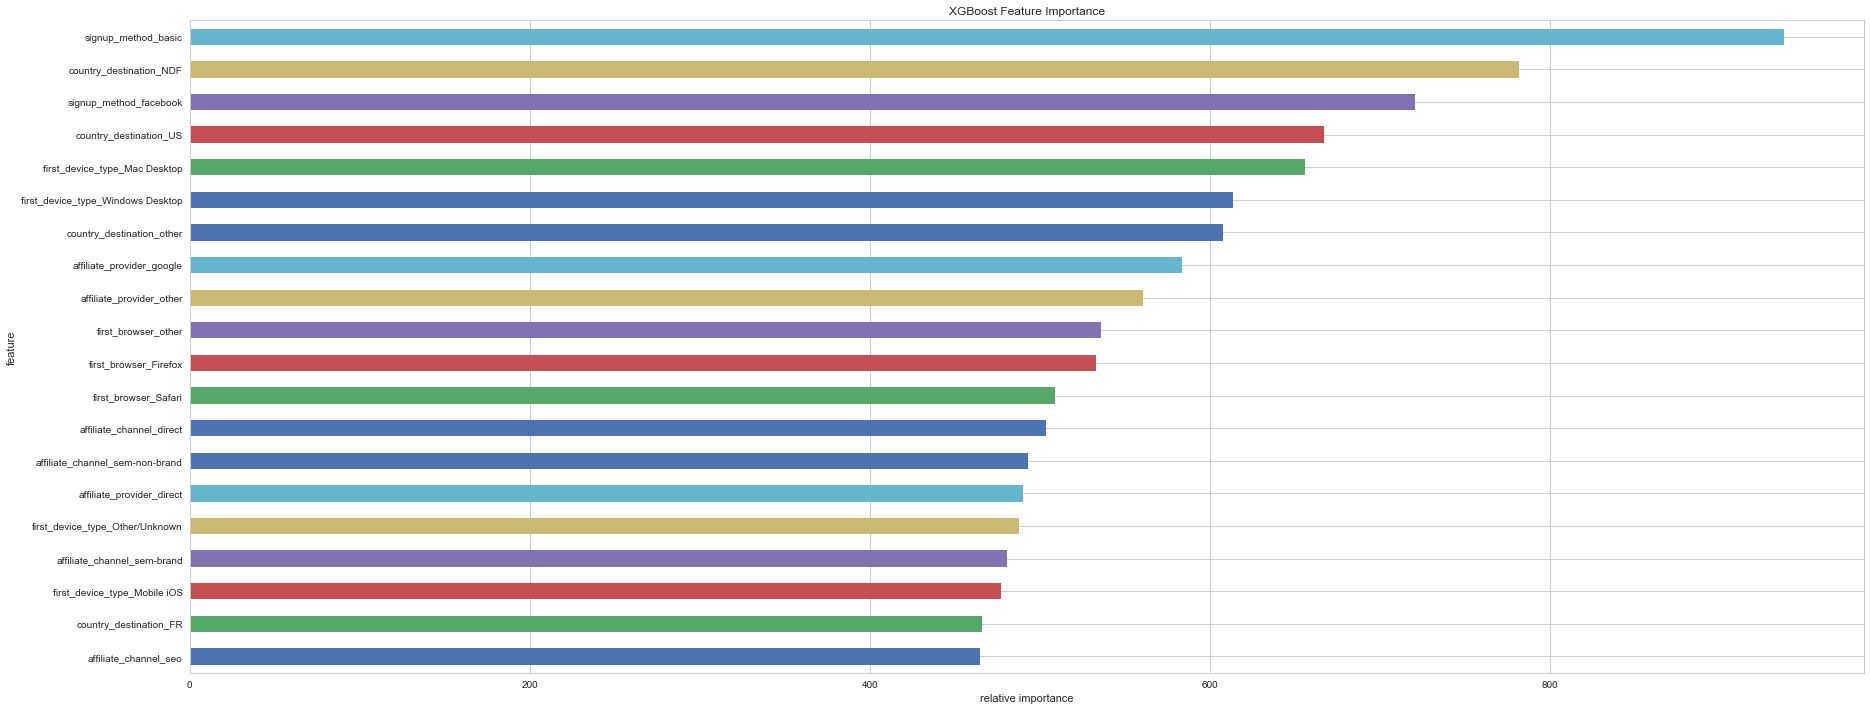

In [75]:
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore',
                   legend=False, figsize=(30, 12))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance.png')

In [ ]:
dtest = xgb.DMatrix(dfX)
y_pred = clf.predict(dtest).reshape(n_test, n_labels)

In [ ]:
ids = []
ages = []
for i in range(len(n_test)):
    idx = test_id[i]
    ids += [idx] * 5
    ages += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()


## 변외 - 세대구분

In [ ]:
train2 = train

bins = [0, 30, 60, 100]
group_names = ["younger", "family", "older"]
train2['group_age'] = pd.cut(train['age'], bins, labels=group_names, right=False)

In [ ]:
train2['group_age'].dropna(axis=0, how='any')

In [ ]:
younger = sum(train2['group_age'] == 'younger')
family = sum(train2['group_age'] == 'family')
older = sum(train2['group_age'] == 'older')

younger_destinations = train2.loc[train2['group_age'] == 'younger', 'country_destination'].value_counts() / younger * 100
family_destinations = train2.loc[train2['group_age'] == 'family', 'country_destination'].value_counts() / family * 100
older_destinations = train2.loc[train2['group_age'] == 'older', 'country_destination'].value_counts() / older * 100

print("young", "\n", younger_destinations,"\n", "family", "\n", family_destinations,"\n", "older", "\n", older_destinations)

plt.figure(figsize=(10,8))
younger_destinations.plot(kind='bar', width=0.2, color='r', position=0, label='Youngers', rot=0)
family_destinations.plot(kind='bar', width=0.2, color='b', position=1, label='Family', rot=0)
older_destinations.plot(kind='bar', width=0.2, color='g', position=2, label='Olders', rot=0)


plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

plt.show()


In [ ]:
train2 = train

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
group_names = ["u10", "10g", "20g", "30g", "40g", "50g", "60g", "70g",
              "80g", "90g"]
train2['group_gen'] = pd.cut(train2['age'], bins, labels=group_names, right=False)
train2['group_gen'].dropna(axis=0, how='any')

### 세대별 여행지 선택

In [ ]:
data3_2 = train2.groupby('group_gen').aggregate({'id':'count'}).reset_index()
data3_2

In [ ]:
data3_2 = train2.pivot_table(columns='group_gen', index=['country_destination'],values='id', aggfunc="count")
data3_2.fillna(0)

In [ ]:
plt.figure(figsize=(10,8))
labels = 'AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other'
sizes = data3_2['20g'].values.tolist()
plt.pie(sizes, autopct='%1.1f%%', labels=labels, shadow=True, startangle=140)
plt.tight_layout()
plt.show()